## Import Libraries

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from xgboost import XGBRegressor
import shap
import time
import tensorflow as tf

## Load Dataset

In [30]:
df = pd.read_csv("mining.csv", delimiter='\t')  # adjust if needed

In [31]:
df.head()

,"date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate"
0,"2017-03-10 01:00:00,""55,2"",""16,98"",""3019,53"",""..."
1,"2017-03-10 01:00:00,""55,2"",""16,98"",""3024,41"",""..."
2,"2017-03-10 01:00:00,""55,2"",""16,98"",""3043,46"",""..."
3,"2017-03-10 01:00:00,""55,2"",""16,98"",""3047,36"",""..."
4,"2017-03-10 01:00:00,""55,2"",""16,98"",""3033,69"",""..."


In [32]:
print(df.columns.tolist())

['date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate']


In [33]:
df.columns

Index(['date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate'], dtype='object')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13283 entries, 0 to 13282
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                                                                                                                          

In [35]:
df = pd.read_csv("mining.csv", sep=',', quotechar='"', encoding='utf-8')

df.columns = df.columns.str.strip()

In [36]:
df.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,"55,2","16,98","3019,53","557,434","395,713","10,0664","1,74","249,214","253,235",...,"250,884","457,396","432,962","424,954","443,558","502,255","446,37","523,344","66,91","1,31"
1,2017-03-10 01:00:00,"55,2","16,98","3024,41","563,965","397,383","10,0672","1,74","249,719","250,532",...,"248,994","451,891","429,56","432,939","448,086","496,363","445,922","498,075","66,91","1,31"
2,2017-03-10 01:00:00,"55,2","16,98","3043,46","568,054","399,668","10,068","1,74","249,741","247,874",...,"248,071","451,24","468,927","434,61","449,688","484,411","447,826","458,567","66,91","1,31"
3,2017-03-10 01:00:00,"55,2","16,98","3047,36","568,665","397,939","10,0689","1,74","249,917","254,487",...,"251,147","452,441","458,165","442,865","446,21","471,411","437,69","427,669","66,91","1,31"
4,2017-03-10 01:00:00,"55,2","16,98","3033,69","558,167","400,254","10,0697","1,74","250,203","252,136",...,"248,928","452,441","452,9","450,523","453,67","462,598","443,682","425,679","66,91","1,31"


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13283 entries, 0 to 13282
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   date                          13283 non-null  object
 1   % Iron Feed                   13283 non-null  object
 2   % Silica Feed                 13283 non-null  object
 3   Starch Flow                   13283 non-null  object
 4   Amina Flow                    13283 non-null  object
 5   Ore Pulp Flow                 13283 non-null  object
 6   Ore Pulp pH                   13283 non-null  object
 7   Ore Pulp Density              13283 non-null  object
 8   Flotation Column 01 Air Flow  13283 non-null  object
 9   Flotation Column 02 Air Flow  13283 non-null  object
 10  Flotation Column 03 Air Flow  13283 non-null  object
 11  Flotation Column 04 Air Flow  13282 non-null  object
 12  Flotation Column 05 Air Flow  13282 non-null  object
 13  Flotation Column

In [38]:
df.isnull().sum()

,0
date,0
% Iron Feed,0
% Silica Feed,0
Starch Flow,0
Amina Flow,0
Ore Pulp Flow,0
Ore Pulp pH,0
Ore Pulp Density,0
Flotation Column 01 Air Flow,0
Flotation Column 02 Air Flow,0


## Data Cleaning and Preprocessing

In [39]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

for col in df.columns:
    if col != 'date':
        df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', '.').str.strip(), errors='coerce')

## Feature Engineering: Lag and Rolling Mean

In [40]:
for col in df.columns:
    if 'Air Flow' in col or 'Level' in col:
        df[f'{col}_lag1'] = df[col].shift(1)
        df[f'{col}_roll3'] = df[col].rolling(window=3).mean()

df.dropna(inplace=True)

## EDA and Correlation Analysis

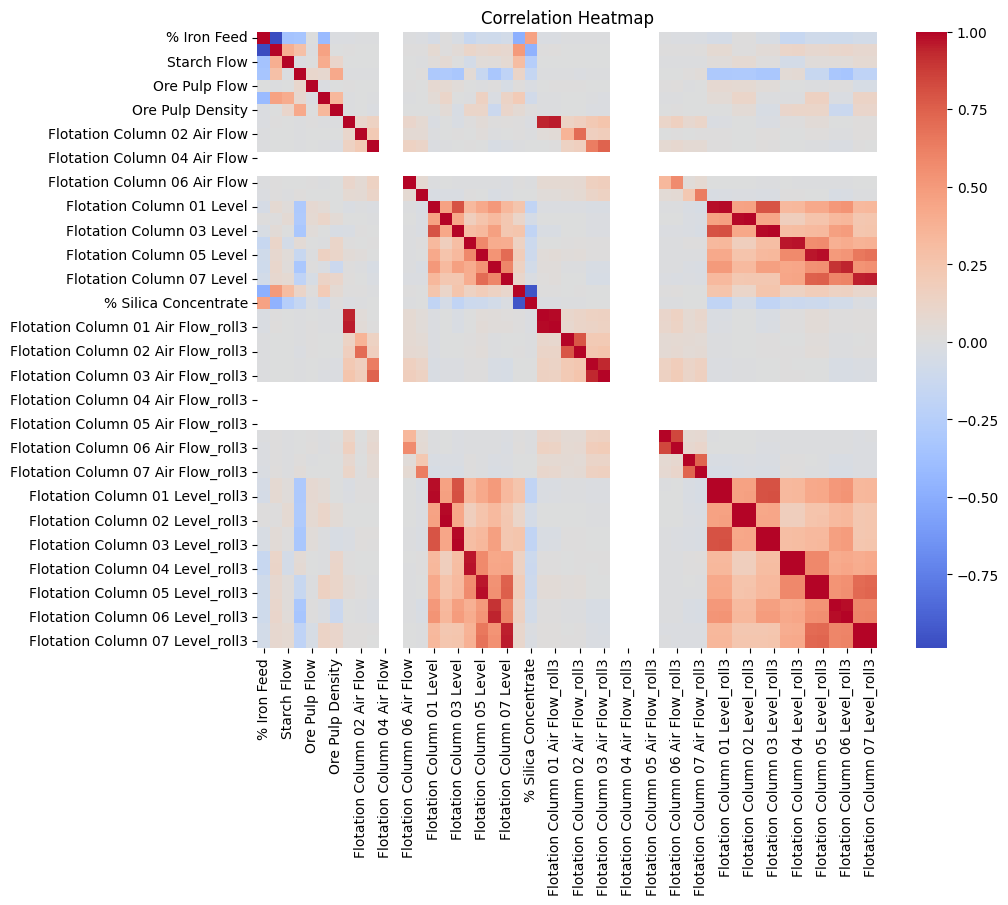

In [41]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()

In [42]:
correlation_matrix = df.drop(columns='date').corr()
correlation_with_target = correlation_matrix["% Silica Concentrate"].sort_values(ascending=False)
print(correlation_with_target)

% Silica Concentrate                  1.000000
% Iron Feed                           0.458089
Ore Pulp Density                      0.011015
Flotation Column 07 Air Flow_roll3    0.001441
Flotation Column 07 Air Flow_lag1     0.001201
Flotation Column 07 Air Flow          0.000979
Flotation Column 03 Air Flow          0.000750
Flotation Column 03 Air Flow_lag1    -0.000294
Flotation Column 03 Air Flow_roll3   -0.000318
Flotation Column 06 Air Flow         -0.004744
Flotation Column 06 Air Flow_lag1    -0.005105
Flotation Column 02 Air Flow         -0.005149
Flotation Column 02 Air Flow_lag1    -0.005293
Flotation Column 02 Air Flow_roll3   -0.007120
Flotation Column 06 Air Flow_roll3   -0.007454
Flotation Column 01 Air Flow_lag1    -0.015034
Flotation Column 01 Air Flow         -0.015308
Flotation Column 01 Air Flow_roll3   -0.015459
Flotation Column 07 Level_lag1       -0.015930
Flotation Column 07 Level            -0.016318
Flotation Column 07 Level_roll3      -0.016374
Ore Pulp Flow

## Preparing Data for Modelling

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['date', '% Silica Concentrate', '% Iron Concentrate'])
y = df['% Silica Concentrate']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Training XGBoost Regressor

In [44]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

model = XGBRegressor(n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Test RMSE: {rmse:.2f}")
print(f"Test R² Score: {r2:.2f}")

Test RMSE: 0.24
Test R² Score: 0.96


## SHAP Analysis: Feature Importance

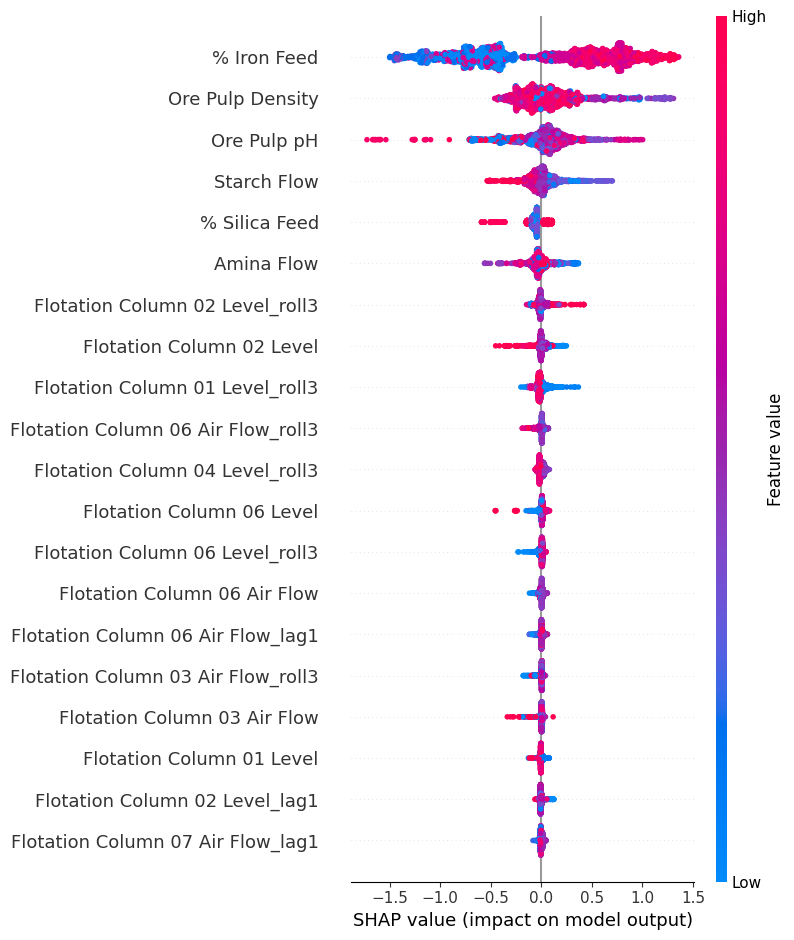

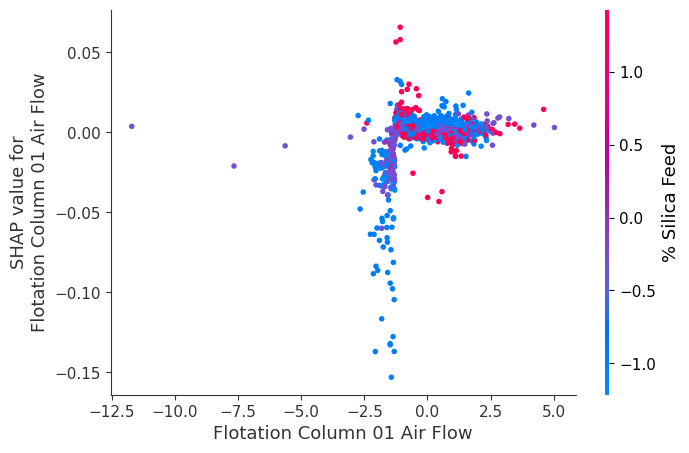

In [45]:
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test, feature_names=X.columns)

shap.dependence_plot("Flotation Column 01 Air Flow", shap_values.values, X_test, feature_names=X.columns)

## Simulated Batch Inference

In [28]:
for i in range(0, len(X_test), 20):
    batch = X_test[i:i+20]
    preds = model.predict(batch)
    print(f"Batch {i//20 + 1}: {preds.round(2)}")
    time.sleep(1)

Batch 1: [2.74 1.74 2.65 1.92 1.26 2.77 3.31 1.28 1.71 2.53 1.26 1.24 4.35 2.57
 2.44 2.75 1.53 2.1  3.81 1.87]
Batch 2: [1.32 1.88 1.04 1.07 1.87 2.18 2.76 3.73 1.03 3.07 1.81 1.5  2.04 1.21
 3.31 1.49 2.54 1.51 2.   2.7 ]
Batch 3: [1.82 1.57 1.38 3.9  2.41 1.99 1.5  1.19 3.45 1.93 1.95 1.71 2.57 1.37
 1.93 2.1  1.04 5.08 2.63 2.54]
Batch 4: [3.65 5.01 5.13 2.96 1.22 3.06 1.6  2.95 2.03 2.74 1.92 3.61 1.28 1.44
 4.99 4.65 1.43 1.92 1.86 2.3 ]
Batch 5: [2.9  3.89 3.86 1.25 2.04 2.38 1.11 3.55 2.69 2.79 1.29 1.23 1.96 4.13
 4.63 3.06 3.58 2.12 1.97 1.52]
Batch 6: [2.27 2.7  2.93 4.1  2.27 1.25 3.23 5.09 5.1  3.54 3.84 1.18 2.11 1.51
 2.18 1.07 3.48 2.99 3.18 3.58]
Batch 7: [1.17 1.43 1.14 1.87 1.81 2.69 2.77 1.54 4.24 3.77 2.76 3.92 2.41 2.05
 4.25 2.18 2.55 1.63 4.67 1.21]
Batch 8: [1.34 1.29 1.02 1.91 3.47 5.04 4.45 2.76 1.23 3.95 3.76 3.14 1.22 2.32
 2.13 4.26 1.22 2.54 1.85 1.46]
Batch 9: [3.71 2.5  4.43 2.68 1.23 3.46 1.71 1.06 1.46 4.61 1.29 4.75 4.83 2.68
 1.1  2.44 1.33 1.91 3.8